# Data Science & Engineering Methods 


###Model Interpretability using SHAP

###Abstract:

Zomato is an online ordering and food delivering platform where the orders will be delivered by the couriers all around the country.

Zomato offers restaurant information, menus, and user reviews and more other options for their selected partners in the different cities. 
This dataset contains the information of the resturants in the Bengaluru city.

Reference: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset




<br> The aim of the notebook is to do the following analysis.
1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

###Getting our data

This dataset contains 50000 rows and 17 columns of data which is higher than GitHub's threshold of .csv files(Generally it is not larger than 100MB). 
So, I pulled the kaggle dataset data directly from Kaggle with my API tokens.

In [ ]:
# installing dependencies
!pip install plotly
!pip install shap
!pip install eli5
!pip install -q kaggle
#installing h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=a9f2a6ca5e76eb9275664ee0ecd841325924406a6a0397553ca8242c97a490d1
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
#importing all necessary libraries
%matplotlib inline  
import random, os, sys
import h2o
import pprint
import operator
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import math
import shap

     

In [ ]:
#making a directory for kaggle api

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyamyneni123","key":"2546107efd3aa943c0b742f6638a9937"}'}

Downloaded the data directly from the Kaggle.Check the below link for the reference to work on your dataset.
<br> https://www.kaggle.com/general/74235

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
# dowloading the data set from the kaggle and reading it
! kaggle datasets list -s zomato



ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          51651       1212  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          48371        644  0.7941176        
rishikeshkonapure/zomato                                     Zomato                                              89MB  2022-10-29 06:56:33           2112         59  1.0              
rajeshrampure/zomato-dataset                                 Zomato Dataset     

Searching my dataset from the above all the kaggle datasets on Zomato.

In [ ]:
# searching for my dataset from the list below
! kaggle datasets download -d rajeshrampure/zomato-dataset 

 98% 87.0M/89.0M [00:04<00:00, 25.6MB/s]
100% 89.0M/89.0M [00:04<00:00, 19.8MB/s]


In [ ]:
#unzip the downloaded file
!unzip zomato-dataset.zip

Archive:  zomato-dataset.zip
  inflating: zomato.csv              


##Reading Data

In [ ]:
data = pd.read_csv("zomato.csv")
data.shape
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


The data has been read and has been shaped accordingly and head method shows the first 5 rows of the data set.

#Cleaning Data

###Dropping columns 

The columns phone, dish_liked, url, menu_item, and reviews_list has been dropped because they dont add characteristics to the data.

In [ ]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### Renaming Column Names
The column names has been renamed accordingly for easy understanding and ease. 

In [ ]:
data.rename(columns={'name':'Restaurant','online_order': 'Online Booking', 'book_table':'Dine-In','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost(Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

,Restaurant,Online Booking,Dine-In,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


###Missing Data

We have three methods for imputing missing data. 
<br>Median
<br>Dropping 
<br>Machine Learning
Here the data with the NaN values will be checked and missing count for each column will be taken in a loop.
<br>1.isna() is a method to check the not a number value 
<br>2.%missing will the missing values of the each columns out of 100.

In [ ]:
missing_list = data.columns[data.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / data.shape[0]) * 100
Missing_DF

,Missing_Column,Missing_Values,%_Missing
0,Rating,7775,15.033741
1,City,21,0.040606
2,Restaurant Type,227,0.438927
3,Cuisines,45,0.087012
4,Cost(Rupees),346,0.669026


**Note**: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.
We see that most of our missing data is Rating. The median method in this case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not get the chance pass the inspection exam with rating "NEW" should not be replaced by a 3 star rating when there is an equal chance the restaurant could be of lower or higher quality. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method for columns that are missing 5% or less of data since it is a very small percentage of missing data.





In [ ]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       30958 non-null  object
 1   Online Booking   30958 non-null  object
 2   Dine-In          30958 non-null  object
 3   Rating           30958 non-null  object
 4   Number of Votes  30958 non-null  int64 
 5   City             30958 non-null  object
 6   Restaurant Type  30958 non-null  object
 7   Cuisines         30958 non-null  object
 8   Cost(Rupees)     30958 non-null  object
 9   Meal Type        30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


Data with Nan and duplicates has been dropped.

In [ ]:
data.isnull().sum()

Restaurant         0
Online Booking     0
Dine-In            0
Rating             0
Number of Votes    0
City               0
Restaurant Type    0
Cuisines           0
Cost(Rupees)       0
Meal Type          0
dtype: int64

### Removing Duplicate values
In case we have any duplicated rows, we remove duplicates so that we ensure there is no repetation.

In [ ]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       30958 non-null  object
 1   Online Booking   30958 non-null  object
 2   Dine-In          30958 non-null  object
 3   Rating           30958 non-null  object
 4   Number of Votes  30958 non-null  int64 
 5   City             30958 non-null  object
 6   Restaurant Type  30958 non-null  object
 7   Cuisines         30958 non-null  object
 8   Cost(Rupees)     30958 non-null  object
 9   Meal Type        30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


### Cleaning individual columns
We should check each and individual columns and clean the values which are not given or not a number

In [ ]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here from the above data we are having the values NEW and '_' which are not a number and those value are being replaced with NaN
<br> A function clean has been defined which checks the values that are not a number 
<br>Second part converts the above N/P rating to the rating to a string value taking the numerator part and again converting to the actual float value

In [ ]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       30958 non-null  object 
 1   Online Booking   30958 non-null  object 
 2   Dine-In          30958 non-null  object 
 3   Rating           29638 non-null  float64
 4   Number of Votes  30958 non-null  int64  
 5   City             30958 non-null  object 
 6   Restaurant Type  30958 non-null  object 
 7   Cuisines         30958 non-null  object 
 8   Cost(Rupees)     30958 non-null  object 
 9   Meal Type        30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [ ]:
data = data.dropna(subset=["Rating"])
data['Rating'] = [round(x) for x in data['Rating']]

In [ ]:
data['Rating'].unique()

array([4, 5, 3, 2])

#####*Location*

In [ ]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

Value_Counts gives the count of the values in the descending order list as shown below.

In [ ]:
data['City'].value_counts(ascending=False)

BTM                      2100
Indiranagar              1583
Koramangala 5th Block    1554
Whitefield               1537
HSR                      1480
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: City, Length: 92, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

####Cost

In [ ]:
data['Cost(Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.

In [ ]:
data = data.dropna()

In [ ]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost(Rupees)']=data['Cost(Rupees)'].apply(money)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       29638 non-null  object
 1   Online Booking   29638 non-null  object
 2   Dine-In          29638 non-null  object
 3   Rating           29638 non-null  int64 
 4   Number of Votes  29638 non-null  int64 
 5   City             29638 non-null  object
 6   Restaurant Type  29638 non-null  object
 7   Cuisines         29638 non-null  object
 8   Cost(Rupees)     29638 non-null  int64 
 9   Meal Type        29638 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


Function 'Money' has been used and the values with"," has been removed and changed to a integer value

####Dine_In Booking

In [ ]:
data['Dine-In'].unique()

array(['Yes', 'No'], dtype=object)

Dine- In has no typos so we can proceed.

####Online Booking

In [ ]:
data['Online Booking'].unique()

array(['Yes', 'No'], dtype=object)

Online  has no typos so we can proceed.

###Resturant Type

In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [ ]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   9492
Casual Dining                 7151
Cafe                          2420
Dessert Parlor                1309
Delivery                      1054
                              ... 
Bakery, Food Court               2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: Restaurant Type, Length: 87, dtype: int64


The Restaurant type has lots of values with multiple values for one restaurant. We can simplify the types of different varities into a general set of groups for better understanding.
<br>Function typesimplfy has been applied to the dataset .

In [ ]:
def typeSimplify(value):
    value = str(value)
    if 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value:
        return 'Dessert'
    elif 'Quick Bites' in value:
      return 'Quick Bites'
    elif 'Bar' in value or 'Microbrewery' in value:
      return 'Bar'
    elif 'Bakery' in value:
      return 'Bakery'
    elif 'Casual Dining' in value:
      return 'Casual Dining'
    elif 'Fine Dining' in value:
      return 'Fine Dining'
    elif 'Food Court' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value:
      return 'North Indian'
    elif 'South Indian' in value:
      return 'South Indian'
    else:
        return value
    
data['Restaurant Type']=data['Restaurant Type'].apply(typeSimplify)
data['Restaurant Type'].head(10)

0    Casual Dining
1    Casual Dining
2    Casual Dining
3      Quick Bites
4    Casual Dining
5    Casual Dining
6    Casual Dining
7    Casual Dining
8             Cafe
9             Cafe
Name: Restaurant Type, dtype: object

In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Mess',
       'Dessert', 'Pub', 'Bakery', 'Takeaway, Delivery', 'Fine Dining',
       'Beverage Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway',
       'Lounge', 'Street Food', 'Dhaba', 'Club', 'Bhojanalya'],
      dtype=object)

In [ ]:
data['Restaurant Type'].isnull().sum()

0

#####Meal Type

In [ ]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data['Meal Type'].value_counts()

Delivery              13504
Dine-out              10867
Desserts               2031
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: Meal Type, dtype: int64

Meal Type has no typos so we can proceed.

####Cuisine

In [ ]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
data['Cuisines'].value_counts()

North Indian                                1518
North Indian, Chinese                       1339
South Indian                                 851
Bakery, Desserts                             455
Biryani                                      410
                                            ... 
South Indian, Mangalorean, Chinese             1
Fast Food, Andhra                              1
Kerala, Biryani, North Indian, Chettinad       1
North Indian, Street Food, Fast Food           1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

Cuisines have multiple values for one restaurant with repeating keywords but they show has different categories so they are generalized and grouped into small categories for better analysis.

In [ ]:
data['Cuisines'].isnull().sum()

0

In [ ]:
def cuisineSimplify(value):
    value = str(value)
    if 'Italian' in value or 'Pizza' in value:
        return 'Italian'
    elif 'African' in value:
      return 'African'
    elif 'Continental' in value:
      return 'Continental'
    elif "Mughlai" in value or 'Middle Eastern' in value or 'Biryani' in value or 'Arabian' in value or 'Turkish' in value:
      return 'Middle Eastern'
    elif 'Burger' in value or 'American' in value or 'Salad' in value or 'Sandwich' in value:
      return 'American'
    elif 'Indian' in value and 'Chinese' in value:
      return 'Asian Fusion'
    elif 'Thai' in value or 'Japanese' in value or 'Asian' in value or 'Chinese' in value or 'Tibetan' in value or 'Momo' in value:
      return 'Asian'
    elif 'Mexican' in value:
      return 'Mexican'
    elif 'Street Food' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value or 'Rajasthani' in value or "Gujarati" in value or 'Bengali' in value:
      return 'North Indian'
    elif 'South Indian' in value or 'Kerala' in value or 'Bengali' in value or 'Andhra' in value or 'Maharashtrian':
      return 'South Indian'
    elif 'Mediterranean' in value:
      return 'Mediterranean'
    elif 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value or 'Mithai' in value:
      return 'Dessert'
    elif 'Cafe' in value:
      return 'Cafe'
    else:
        return value
    
data['Cuisines']=data['Cuisines'].apply(cuisineSimplify)
data['Cuisines'].head(10)


0    Middle Eastern
1      Asian Fusion
2           Italian
3      North Indian
4      North Indian
5      North Indian
6      Asian Fusion
7           Italian
8           Italian
9           Italian
Name: Cuisines, dtype: object

In [ ]:
data['Cuisines'].unique()

array(['Middle Eastern', 'Asian Fusion', 'Italian', 'North Indian',
       'Cafe', 'Continental', 'Fast Food', 'American', 'South Indian',
       'Asian', 'Street Food', 'African', 'Mexican'], dtype=object)

####Resturant

In [ ]:
data.drop(['Restaurant'],axis = 1,inplace=True)

Restaurant names have some different characters so that should be replaced by the alphabets using the regex expression which is applied on the data set.

####Number of Votes

In [ ]:
data = data.dropna(subset=['Number of Votes'])

In [ ]:
data['Number of Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [ ]:
ALOT = 1e6
data['Number of Votes'] = [max(min(x, ALOT), -ALOT) for x in data['Number of Votes']]

#Feature creation and analysis

Now that our dataset is cleaned up, let us standardize the data to compare data in the same unit set by eliminating extraneous data, and identifying data errors/multicollinearity.

In [ ]:
data = data.dropna()

In [ ]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Online Booking   29638 non-null  object
 1   Dine-In          29638 non-null  object
 2   Rating           29638 non-null  int64 
 3   Number of Votes  29638 non-null  int64 
 4   City             29638 non-null  object
 5   Restaurant Type  29638 non-null  object
 6   Cuisines         29638 non-null  object
 7   Cost(Rupees)     29638 non-null  int64 
 8   Meal Type        29638 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.3+ MB


In [ ]:
data_clean = data #making a copy so we don't lose all that progress!

In [ ]:
data_clean['Dine-In'] = data_clean['Dine-In'].map({'Yes': 1, 'No': 0})

We can convert our catagorical variables to numerical ones by creating a new column for each group with a binary value of 1 if that value belongs to that entry (0 if not).

In [ ]:
data_clean['Online Booking'] = data_clean['Online Booking'].map({'Yes': 1, 'No': 0})

In [ ]:
X = data_clean.drop(['Rating'],axis=1)
Y = data_clean['Rating']

catagorical_features = ['City', 'Restaurant Type', 'Cuisines', 'Meal Type']
numerical_features = [c for c in X.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)

##Linear Regression

Linear regression on the ratings

We can use the mapper we built in the previous section to transform the training and testing sets to a uniform scale. The mapper function allows us to reuse that rule as we see fit.

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
from sklearn.model_selection import  train_test_split
from sklearn import datasets, linear_model

data_clean = data_clean.dropna(subset=['Rating'])

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

preprocessed_lin_X_train = mapper.fit_transform(X_train)
preprocessed_lin_X_train = sm.add_constant(preprocessed_lin_X_train)

model = sm.OLS(y_train, preprocessed_lin_X_train, axis =1).fit()

# Print out the statistics
model.summary()

unknown kwargs ['axis']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     518.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:29:31   Log-Likelihood:                -13894.
No. Observations:               22672   AIC:                         2.781e+04
Df Residuals:                   22663   BIC:                         2.788e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8110      0.012    316.844      0.000       3.787       3.835
Online Booking      0.0541      0.003     17.539      0.000       0.048       0.060
Dine-In             0.0489      0.004     12.450      0.000       0.041       0.057
Number of Votes     0.1054      0.003     31.976      0.000       0.099       0.112
Cost(Rupees)        0.0584      0.004     13.794      0.000       0.050       0.067
City            -5.055e-05      0.000     -0.442      0.659      -0.000       0.000
Restaurant Type    -0.0065      0.001    -11.446      0.000      -0.008      -0.005
Cuisines            0.0038      0.001      4.215      0.000       0.002       0.006
Meal Type          -0.0064      0.003     -2.504      0.012      -0.011      -0.001
==============================================================================
Omnibus:                     2048.850   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2647.042
Skew:                          -0.827   Prob(JB):                         0.00
Kurtosis:                       3.256   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Taking a look at our coefficients, we see that all features are significant except for City with a t-score lower than the p-value and the confident interval overlapping 0. We also see a y-intercept of 3.811 meaning that restaurants will typically be rated with 3.811 stars when all other factors are 0 or none. Additionally, Number of Votes shows the biggest positive influence on Ratings and Cuisine showing least influence on Ratings. Restaurant Type and Meal Type can slightly negatively impact a restaurant's ratings while the presence of Online Booking, Dine-In, Number of Votes, Cost, and Cuisines have a postive impact on Rating.

In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = preprocessed_lin_X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(preprocessed_lin_X_train.values, i) for i in range(preprocessed_lin_X_train.shape[1])]
vif.head(10)

,features,vif_Factor
0,const,16.439729
1,Online Booking,1.079364
2,Dine-In,1.753220
3,Number of Votes,1.235039
4,Cost(Rupees),2.036943
5,City,1.028115
6,Restaurant Type,1.287198
7,Cuisines,1.037189
8,Meal Type,1.076453


It is usually considered to be highly correlated if the VIF value is higher than 5. None of the values we were looking at show a VIF value of 5 so we can assume there is no multicollinearly. A large vif in the constant indicates that the (slope) explanatory variables have also a large constant component. An example would be when a variable has a large mean but only a small variance.

We now preform linear regression using our standardized training sets without City.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()
preprocessed_lin_X_train = preprocessed_lin_X_train.drop('City', axis=1)

# Train the model using the training sets
regr.fit(preprocessed_lin_X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(preprocessed_lin_X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
     

Mean squared error: 0.20
Coefficient of determination: 0.15
R^2 score on training set = 0.1547079562576278


In [ ]:
# Make predictions using the training set
y_pred = regr.predict(preprocessed_lin_X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.20
Coefficient of determination: 0.15
R^2 score on training set = 0.1547079562576278


With a low R^2 score and low coefficient of determination score, Linear Regression may not be suitable for our dataset.

##Random Forest

In this section, we will perform Random Forest Classifier on the dataset. We will first encode the categorical features and impute the numerical features to standardize the dataset.

In [ ]:
X = data_clean.drop(['Rating'],axis=1)
Y = data_clean['Rating']

catagorical_features = ['City', 'Restaurant Type', 'Cuisines', 'Meal Type']
numerical_features = [c for c in X.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

preprocessed_rft_X_train = mapper.fit_transform(X_train)
preprocessed_rft_X_train = sm.add_constant(preprocessed_rft_X_train)
model = RandomForestClassifier()
model.fit(preprocessed_rft_X_train, y_train)


RandomForestClassifier()

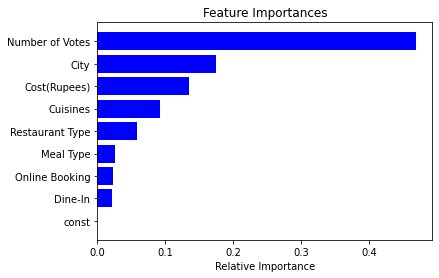

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = preprocessed_rft_X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In this model, we see that Number of Votes, City, and Cost have the most importance on Rating. Meal Type, Online Booking and Dine In have the lowest relative importance close to 0 meaning they are less useful in predicting Rating. Cuisines and Restaurant Type can have a slight impact on Ratings for a restaurant.

In [ ]:
# Make predictions using the testing set
y_pred = model.predict(preprocessed_rft_X_train)

In [ ]:
from sklearn import metrics
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.99
R^2 score on training set = 0.9865401807248287


This is close to 100% accuracy. With an R^2 score of .99, we can say this model can predict Rating with little to none error. The coefficient of determination of 99% tells us that 99% of our data lies within the models predictions. And a mean squared error of 0 further proves there is very little error with this dataset.

In [ ]:
# Make predictions using the testing set
preprocessed_rft_X_test = mapper.fit_transform(X_test)
preprocessed_rft_X_test = sm.add_constant(preprocessed_rft_X_test)
y_pred = model.predict(preprocessed_rft_X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7999325236167342


##Auto ML

##Building the model
###Initializing H2O
###Modeling (AutoML)


In [ ]:
min_mem_size=6 
run_time=333

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
#installing dependencies
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmb31i7hh
  JVM stdout: /tmp/tmpmb31i7hh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmb31i7hh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_oztwgq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [ ]:
#Viewing data 
data = h2o.H2OFrame(data_clean)
data.shape
data.describe()
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:29638
Cols:9

,Online Booking,Dine-In,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
type,int,int,int,int,enum,enum,enum,int,enum
mins,0.0,0.0,2.0,0.0,,,,40.0,
mean,0.648019434509751,0.17929684864025913,3.7513664889668608,425.3797827113847,,,,634.0447398609892,
maxs,1.0,1.0,5.0,16832.0,,,,6000.0,
sigma,0.4775960041068574,0.3836071607362359,0.48789440532137324,1007.2929150656364,,,,480.9124985000013,
zeros,10432,24324,0,19,,,,0,
missing,0,0,0,0,0,0,0,0,0
0,1.0,1.0,4.0,775.0,Banashankari,Casual Dining,Middle Eastern,800.0,Buffet
1,1.0,0.0,4.0,787.0,Banashankari,Casual Dining,Asian Fusion,800.0,Buffet
2,1.0,0.0,4.0,918.0,Banashankari,Casual Dining,Italian,800.0,Buffet


Online Booking,Dine-In,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
1,1,4,775,Banashankari,Casual Dining,Middle Eastern,800,Buffet
1,0,4,787,Banashankari,Casual Dining,Asian Fusion,800,Buffet
1,0,4,918,Banashankari,Casual Dining,Italian,800,Buffet
0,0,4,88,Banashankari,Quick Bites,North Indian,300,Buffet
0,0,4,166,Basavanagudi,Casual Dining,North Indian,600,Buffet
1,0,4,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
0,0,4,8,Mysore Road,Casual Dining,Asian Fusion,800,Buffet
1,1,5,2556,Banashankari,Casual Dining,Italian,600,Cafes
1,0,4,324,Banashankari,Cafe,Italian,700,Cafes
1,0,4,504,Banashankari,Cafe,Italian,550,Cafes


##predicting rating
Now that we have initialized H2O with the zomato dataset, we should split the values into training and test datasets for verification.

In [ ]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [ ]:
# assign target and inputs for logistic regression
y = 'Rating'
X = [name for name in train.columns if name != y]
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
print(y)
print(X)

Rating
['Online Booking', 'Dine-In', 'Number of Votes', 'City', 'Restaurant Type', 'Cuisines', 'Cost(Rupees)', 'Meal Type']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

Using AutoML, pass in training and testing datasets as well as the predictor values to predict Rating.

In [ ]:
aml.train(x=X,y=y,training_frame=train, validation_frame=test)   # Change training_frame=train

AutoML progress: |
03:09:18.579: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████
03:10:59.285: GLM_1_AutoML_2_20230325_30918 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 135 out of bounds for length 135

███████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20230325_30918


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    124                496                         978303                 8            15           14.3871       32            139           117.583

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.03831885445172922
RMSE: 0.1957520228547568
LogLoss: 0.14556472314696187
Mean Per-Class Error: 0.03987938769744634
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error       Rate
---  ----  -----  ---  ----------  ------------
155  0     1      0    0.00641026  1 / 156
2    5001  640    0    0.113769    642 / 5,643
1    285   15802  3    0.0179604   289 / 16,091
0    0     9      412  0.0213777   9 / 421
158  5286  16452  415  0.0421765   941 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.957824
2    0.999866
3    1
4    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.07662370401592354
RMSE: 0.2768098697949976
LogLoss: 0.2577909050836461
Mean Per-Class Error: 0.18546983806569534
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
34   7     9     0    0.32       16 / 50
2    1410  455   0    0.244778   457 / 1,867
1    252   5023  2    0.0483138  255 / 5,278
0    0     17    115  0.128788   17 / 132
37   1669  5504  117  0.101679   745 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.898321
2    0.997816
3    0.999727
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.08570373348297705
RMSE: 0.2927519999640943
LogLoss: 0.2909275644890123
Mean Per-Class Error: 0.23261852261102633
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error      Rate
---  ----  -----  ---  ---------  --------------
88   14    54     0    0.435897   68 / 156
4    4038  1601   0    0.284423   1,605 / 5,643
4    840   15232  15   0.0533839  859 / 16,091
0    0     66     355  0.15677    66 / 421
96   4892  16953  370  0.116445   2,598 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.883555
2    0.996683
3    0.999641
4    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.883779   0.00991562  0.88259       0.875168      0.883012      0.877633      0.900493

In [ ]:
print(aml.get_leaderboard().head(20))

model_id                                                  mean_per_class_error    logloss      rmse        mse
GBM_1_AutoML_2_20230325_30918                                         0.232619   0.290928  0.292752  0.0857037
XGBoost_1_AutoML_2_20230325_30918                                     0.404644   0.344328  0.325208  0.10576
StackedEnsemble_BestOfFamily_1_AutoML_2_20230325_30918                0.475514   0.336131  0.315122  0.0993021
[3 rows x 5 columns]



In [ ]:
gbmmodel = h2o.get_model(aml.leaderboard[0,'model_id'])

In [ ]:
perf = gbmmodel.model_performance(test)
perf
     

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.07662370401592354
RMSE: 0.2768098697949976
LogLoss: 0.2577909050836461
Mean Per-Class Error: 0.18546983806569534
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
34   7     9     0    0.32       16 / 50
2    1410  455   0    0.244778   457 / 1,867
1    252   5023  2    0.0483138  255 / 5,278
0    0     17    115  0.128788   17 / 132
37   1669  5504  117  0.101679   745 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.898321
2    0.997816
3    0.999727
4    1

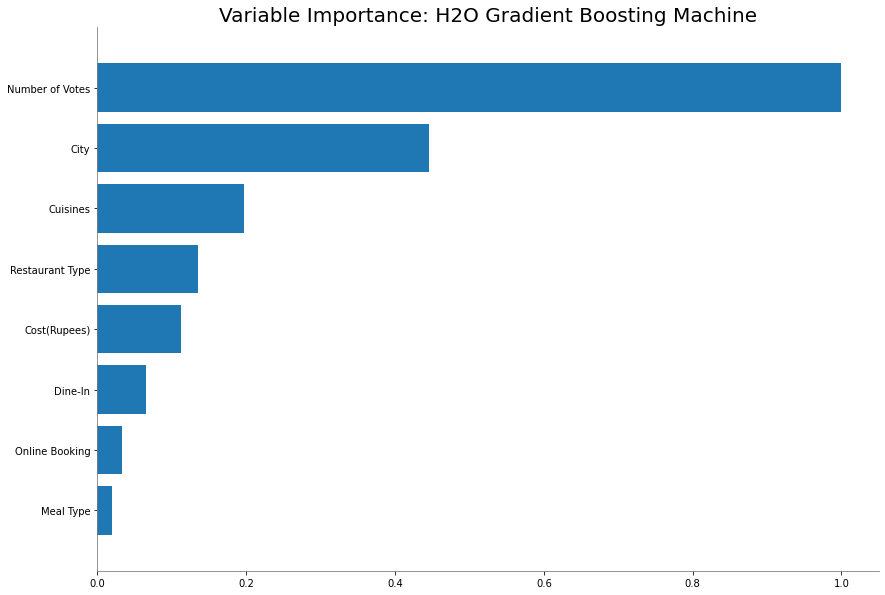

<Figure size 432x288 with 0 Axes>

In [ ]:
gbmmodel.varimp_plot()

##SHAP Interpretation

A model used in the real world to predict response needs to accurate and reliable. But with a few lines of codes, this process becomes very abstract and hard to understand. As data scientist, we must be able to explain predictions and what features are used to make that predictions as well as the magnitude of each feature. In this section, we use SHAP values to interpret our models and pinpoint bugs.

##SHAP Interpretation with Linear regression 

In [ ]:
explainer = shap.Explainer(regr, preprocessed_lin_X_train)
preprocessed_lin_X_test = mapper.fit_transform(X_test)
preprocessed_lin_X_test = sm.add_constant(preprocessed_lin_X_test)
preprocessed_lin_X_test = preprocessed_lin_X_test.drop('City', axis=1)
shap_values = explainer(preprocessed_lin_X_test)

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

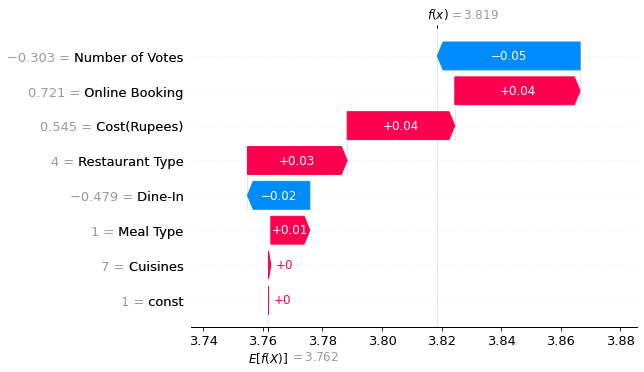

In [ ]:
sample_feature_importance(0, 'waterfall')

What you see above is a sample feature importance plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values can be used to predict ratings for a specific restaurant.

The actual output for this observation is 3.819. The predicted value for the first observation is 3.762. Starting off with the y-intercept, Cuisine has no impact on Rating. Meal Type gives a slight impact on Rating but the lack of needing a Restaurant brought down the Rating with a magnitude of 0.02. Restaurant Type, Cost, and ability of Online booking greatly increased Rating for that perticular restaurant but the Number of Votes had the biggest impact reducing the Rating by 0.05.

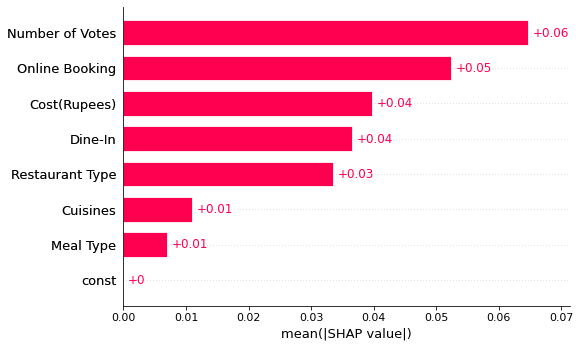

In [ ]:
shap.plots.bar(shap_values)

In this visual, we show the Shapley values proportional to their contribution. Like shown before, the most important features according to the linear model are Number of Votes and Online boking.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


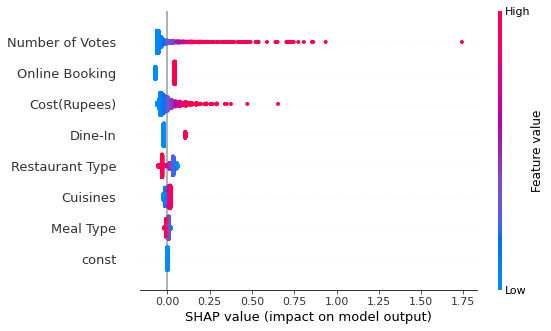

In [ ]:
shap.summary_plot(shap_values, preprocessed_lin_X_test)

In Linear Regression, most of the SHAP values are above zero.

##SHAP Interpretation for Random Forest Trees

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(preprocessed_rft_X_test)

In [ ]:
shap.initjs()

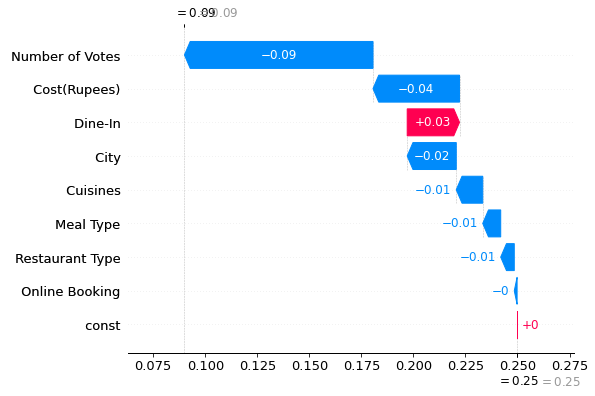

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][0,:], preprocessed_rft_X_test.iloc[0,:])

The actual output for this observation is 0.09. The predicted value for the first observation is 0.25. Starting off with the base at 0.25, Meal Type has no impact on this restaurants Rating. Restaurant Type, not having Online Booking as an option, and the Cuisine have slight negative impact on Rating. The impact of Restaurant Type negates the negative impact on Cost and the impact of City negates the positive impact of Restaurant Type. The Number of Votes has the biggest impact on the model.

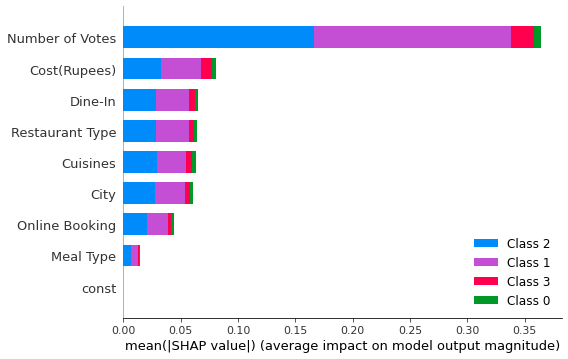

In [ ]:
shap.summary_plot(shap_values, preprocessed_rft_X_test)

In Random Forest, all Classes' mean Shapley value are above 0. This makes sense, where the value would represent the Class number. Instead, we can analyze that the classes are distributed unevenly with most observations belonging to Class 1 or 2.

These graphs plot the feature's value respect to its SHAP value, letting us understand easily how they are related. SHAP also plots a second variables value, which is automatically chosen depending its interaction with the feature at hand. That way the library helps us find multi-dimensional dependences in the data.

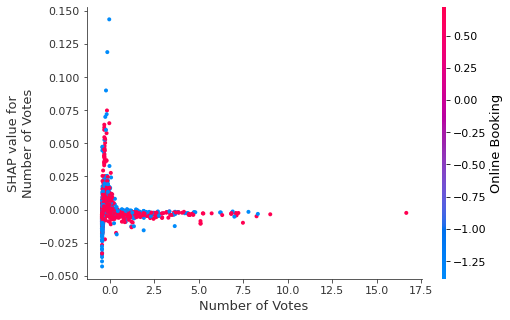

In [ ]:
shap.dependence_plot("Number of Votes", shap_values[0], preprocessed_rft_X_test)

In this case, we plotted Number of Votes against the whole dataset to find that most data points with Number of Votes having highest impact also are likely to have online booking.

##SHAP Interpretation for Auto ML best model

In [ ]:
leader_model = aml.leader
# save the model
model_path = h2o.save_model(model=leader_model, path="leader_model_h2o", force=True)

print(model_path)

# load the model
gbmmodel = h2o.load_model(model_path)

/content/leader_model_h2o/GBM_1_AutoML_2_20230325_30918


In [ ]:
gbmmodel.train(training_frame=data, y="Rating")

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1679711424919_23


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          28649                  5            5            5             9             32            29

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11967528104170136
RMSE: 0.3459411525703488
MAE: 0.242673933075639
RMSLE: 0.07867983850246138
Mean Residual Deviance: 0.11967528104170136

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-03-25 03:16:07  0.092 sec   0.0                0.4878861743590427   0.4051247607037322   0.2380329191307022
     2023-03-25 03:16:07  0.198 sec   1.0                0.47034324918461295  0.3897159762353226   0.2212227720535389
     2023-03-25 03:16:07  0.278 sec   2.0                0.4553722610845253   0.37568880939895516  0.20736389616523304
     2023-03-25 03:16:07  0.351 sec   3.0                0.442887199951787    0.36313943082934425  0.19614907188113415
     2023-03-25 03:16:07  0.405 sec   4.0                0.43219509640149384  0.3516604295183317   0.18679260135349657
     2023-03-25 03:16:07  0.460 sec   5.0                0.42303943164526514  0.3412194375816776   0.17896236072674895
     2023-03-25 03:16:07  0.516 sec   6.0                0.4152952754889342   0.33185859767119164  0.17247016584342975
     2023-03-25 03:16:08  0.608 sec   7.0                0.40867635813907227  0.32341433507774     0.16701636570181527
     2023-03-25 03:16:08  0.682 sec   8.0                0.40271582002093637  0.315525131159944    0.1621800316951352
     2023-03-25 03:16:08  0.736 sec   9.0                0.39771488792851417  0.3085514562591238   0.15817713207999057
---  ---                  ---         ---                ---                  ---                  ---
     2023-03-25 03:16:10  2.926 sec   41.0               0.34976049870688025  0.24619921274260476  0.12233240645568558
     2023-03-25 03:16:10  2.983 sec   42.0               0.3492308231552557   0.24578221464166758  0.12196216784169749
     2023-03-25 03:16:10  3.029 sec   43.0               0.3487670411682218   0.24515858119022702  0.12163844900523615
     2023-03-25 03:16:10  3.081 sec   44.0               0.34850012649748496  0.24492208357885045  0.12145233816876301
     2023-03-25 03:16:10  3.137 sec   45.0               0.3480483523022656   0.24449351883037537  0.121137655540322
     2023-03-25 03:16:10  3.175 sec   46.0               0.3476359281720605   0.24408917498979518  0.12085073855605001
     2023-03-25 03:16:10  3.211 sec   47.0               0.3470889665610858   0.24366099673233274  0.12047075070844254
     2023-03-25 03:16:10  3.261 sec   48.0               0.34658416420940785  0.24323933919646237  0.1201205828807338
     2023-03-25 03:16:10  3.302 sec   49.0               0.3465227001149667   0.2431820600378231   0.12007798169496715
     2023-03-25 03:16:10  3.358 sec   50.0               0.3459411525703488   0.242673933075639    0.11967528104170136
[51 rows x 7 columns]


Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Number of Votes  11529.6                1                    0.624485
City             3629.24                0.314777             0.196573
Cuisines         1602.72                0.139009             0.0868092
Restaurant Type  848.88                 0.0736263        

In [ ]:
 #gbm_shap_values = shap.KernelExplainer(gbmmodel.predict,test)
contributions = gbmmodel.predict_contributions(data)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().values
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:8]
# expected values is the last returned column
expected_value = contributions_matrix[:,8].min()

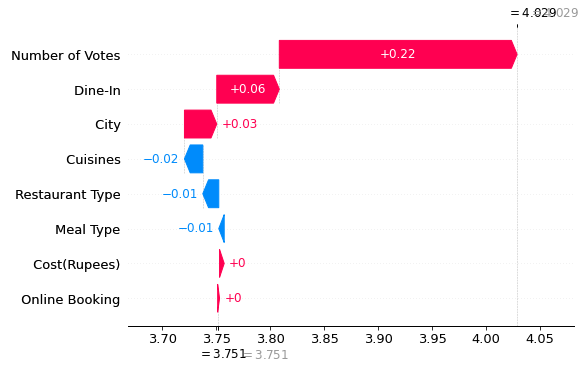

In [ ]:
#shap.plots.waterfall(shap_values[0])
X = data_clean.drop('Rating', axis = 1)

shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[0,:], X.iloc[0,:])

The actual output for this observation is 4.029. The predicted value for the first observation is 3.751. In this instance, we see that Number of Votes and Dine-In have the biggest postive impact on Rating. Compared to the previous examples, this observation shows that having more votes would increase Rating. Cuisines, Restaurant Type and Meal Type have a very slight but negative impace on Rating but nonetheless, Rating is much higher than predicted. The Cost and ability of booking online have no impact on the Rating.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


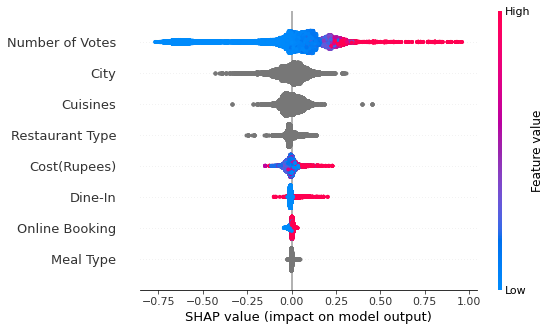

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In the GBM model, all Shapley values are centered around 0, showing equal distribution of impact on value.

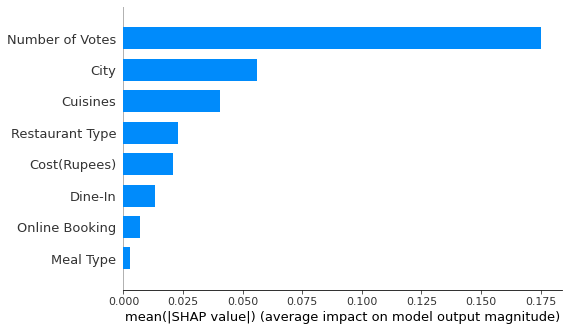

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")


As we've seen in the force plot above, Number of Votes shows to have the highest impact on our data in this model.

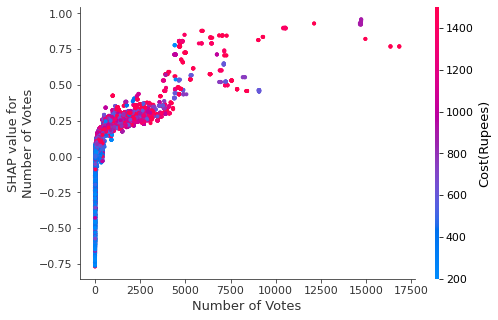

In [ ]:
shap.dependence_plot("Number of Votes", shap_values, X)

Compared to the RFT's dependence plot, the GBM model shows an exponetial relationship with Cost but with a limit at around 5000 Votes.

##Conclusion
From the analysis done above on the data set, we can interpret any model using SHAP values. We were able to view the impact of a feature for each observation and see exactly the observed value differed from the predicted.

References

1.Sckit learn offcial documentation

2.Refered Towards Data Science

3.Eli5 official documentation

https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

H2O.ai Official Documentation

The algorithms were referred directly from the Sckit learn official documentation. 

Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

Copyright (C) <2022> Divya Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE